In [2]:
# !pip install pingouin
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
# import pingouin as pg

In [3]:
url = 'https://media.githubusercontent.com/media/maryclarecc/project4/main/2016-2017%20Excel%20(final%20version).csv'
df = pd.read_csv(url)
df2 = df.replace("#NULL!", 0)
# df.head()
# df.tail()
df2 = df2.drop(["schoolnum"], axis = 1)
# dfconf.head()

/var/folders/08/k5qj0k9j1dbgppb_7vzc5rnm0000gn/T/ipykernel_5056/4185617086.py:2: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [4]:
df3 = df2.apply(pd.to_numeric)
# df3.dtypes.tolist()

In [5]:
df3['height_total'] = df3['height_ft']*12 + df3['height_in']
df3 = df3.loc[df3["wgt_lbs"] < 401,:] 
df3 = df3.loc[df3["height_total"] < 80,:] 
df3["bmi"] = df3["wgt_lbs"] / df3['height_total']**2 * 703
df3.shape

(52525, 480)

In [6]:
df3.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,height_total,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,60.0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,62.0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,62.0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,68.0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,72.0,26.443866


In [7]:
df4 = df3.drop(["wgt_lbs", "height_ft", "height_in", "height_total"], axis = 1)
dfclean = df4.loc[df4["bmi"] > 10] 
dfclean = dfclean.loc[dfclean["bmi"] < 50]
dfclean.shape
dfclean.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_RhodeIslandCollege,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,26.443866


In [8]:
dfclean.shape

(47288, 476)

In [9]:
dfclean.shape

(47288, 476)

In [10]:
# dfclean_2 = dfclean[dfclean.columns.drop(list(df.filter(regex='dx')))]
dfclean_2 = dfclean.drop(['dx_anx', 'dx_attl', 'dx_ea1', 'dx_psy1', 'dx_pers', 'dx_sa1'],axis=1)
# df2 = df2.drop(["schoolnum"], axis = 1)
# dfconf.head()
dfclean_2.shape

(47288, 470)

In [11]:
dfclean_3 = dfclean_2[dfclean_2.columns.drop(list(df.filter(regex='meds')))]
# dfclean_3 = dfclean_2.drop(['meds_1', 'meds_2', 'meds_3', 'meds_4','meds_5', 'meds_6', 'meds_7', 'meds_8', 'meds_reason_1',\
#                                               'meds_reason_2', 'meds_reason_3', 'meds_reason_4', 'meds_reason_5', 'meds_dis', 'meds_cur_1',\
#                                               'meds_cur_2', 'meds_cur_3', 'meds_cur_4', 'meds_cur_5', 'meds_cur_6', 'meds_cur_7', 'meds_cur_8',\
#                                               'meds_cur_9', 'meds_time_1', 'meds_time_2', 'meds_time_3', 'meds_time_4', 'meds_time_5', 'meds_time_6', \
#                                               'meds_time_7', 'med_help', 'meds_helped_me'],axis=1)
dfclean_3.shape

(47288, 438)

In [12]:
dfclean_4 = dfclean_3.drop(['Carleton', 'CentralWashington', 'Ferris', 'Goucher', 'GrandRapidsCC', 'Hocking', 'JamesMadison', 'LSSU', 'Marygrove',\
                            'Minnesota', 'MottCC', 'NorthernMichigan1', 'NorthernMichigan2', 'OldDominion', 'RandolphMacon', 'SeattleCentral',\
                            'SeattleU', 'ShawneeState', 'UWBothell', 'UWTacoma', 'WayneState', 'Whitworth', 'Arkansas1', 'Arkansas2', 'Humboldt1',\
                            'Humboldt2', 'MontanaState', 'PennState', 'UNCG', 'sch_Defiance', 'sch_LakeWA', 'sch_MarylandBaltimore', 'sch_NewSchool',\
                            'sch_PugetSound', 'sch_Radford', 'sch_USC', 'sch_Vanderbilt', 'sch_Wilmington', 'sch_Carleton', 'sch_CentralWashington',\
                            'sch_ClevelandState', 'sch_Denver', 'sch_Ferris', 'sch_FSU', 'sch_Goucher', 'sch_GrandRapidsCC', 'sch_Hocking',\
                            'sch_JamesMadison', 'sch_KentState', 'sch_LakelandCC', 'sch_LSSU', 'sch_Marygrove', 'sch_Michigan','sch_Minnesota', \
                            'sch_MottCC', 'sch_NorthernMichigan', 'sch_OldDominion', 'sch_Oregon', 'sch_PacificLutheran', 'sch_Pomona', \
                            'sch_RandolphMacon', 'sch_SeattleCentral', 'sch_SeattleU', 'sch_ShawneeState', 'sch_Stanford', 'sch_USciences', \
                            'sch_UWBothell', 'sch_UWSeattle', 'sch_UWTacoma', 'sch_Walsh', 'sch_WayneState', 'sch_WhatcomCC', 'sch_Whitworth', \
                            'sch_Denison', 'sch_Lethbridge', 'sch_Loyola', 'sch_UMassBoston', 'sch_Arkansas', 'sch_Humboldt', 'sch_MontanaState', \
                            'sch_PennState', 'sch_RhodeIslandCollege', 'sch_UNCG'],axis=1)
dfclean_4.shape


(47288, 355)

In [13]:
dfclean_5 = dfclean_4.drop(['ther_helped_me','ther_ever', 'ther_vis', 'ther_cur1', 'ther_help','ther_help_me','deprawsc', 'anx_score'],axis=1)

In [14]:
dfclean_6 = dfclean_5[dfclean_5.columns.drop(list(df.filter(regex='tx')))]
dfclean_6.shape

(47288, 336)

In [15]:
dfclean_7 = dfclean_6[dfclean_6.columns.drop(list(df.filter(regex='men_ill')))]
dfclean_7.shape

(47288, 332)

In [16]:
col = []
df_print = dfclean_7
length = len(df_print.columns)

for i in range(0,length):
    name = df_print.columns[i]
    # print(name)
    col.append(name)

# result['Variables'] = col
# print(col)

In [17]:
dffinal = dfclean_7
dffinal.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,fin_comp1,fin_comp2,pay_worry,pay_fam,pay_self,pay_other,pay_grant,pay_loan,dx_dep1,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26.443866


In [18]:
data = dffinal.sample(frac=0.95, random_state=786)
data_unseen = dffinal.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
data_unseen = dffinal.drop(["dx_dep1"], axis=1)
data_unseen.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,aca_sex_assault_7,fin_comp1,fin_comp2,pay_worry,pay_fam,pay_self,pay_other,pay_grant,pay_loan,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26.443866


In [19]:
from pycaret.classification import *
regr = setup(data = data, target = 'dx_dep1', session_id=123,
                  normalize = True, 
                  silent = True,
                  data_split_stratify = True,
                  fix_imbalance = True,
                  transformation = True, 
                  ignore_low_variance = True,
                  feature_selection = True,
                  feature_selection_threshold = 0.005,
                  bin_numeric_features = ["hours_work_paid", "age", "bmi"],
                  high_cardinality_features = ["residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"],
                  remove_multicollinearity = True, multicollinearity_threshold = 0.65) 

,Description,Value
0,session_id,123
1,Target,dx_dep1
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(44924, 332)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,325
8,Ordinal Features,False
9,High Cardinality Features,True


In [20]:
# data.head()

In [21]:
# best = compare_models()

In [22]:
lr = create_model('lr', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7482,0.8185,0.7558,0.4545,0.5677,0.4052,0.4313
1,0.7590,0.8195,0.7253,0.4672,0.5683,0.4118,0.4310
2,0.7545,0.8139,0.7253,0.4612,0.5638,0.4046,0.4247
3,0.7615,0.8195,0.7500,0.4717,0.5791,0.4246,0.4468
4,0.7615,0.8360,0.7573,0.4719,0.5815,0.4270,0.4504
5,0.7717,0.8386,0.7703,0.4862,0.5962,0.4482,0.4712
6,0.7560,0.8413,0.7656,0.4647,0.5783,0.4208,0.4468
7,0.7500,0.8203,0.7351,0.4554,0.5624,0.4006,0.4231
8,0.7580,0.8221,0.7427,0.4667,0.5732,0.4163,0.4382


In [23]:
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7514,0.7870,0.6773,0.4542,0.5438,0.3819,0.3963
1,0.7781,0.8003,0.6642,0.4946,0.5670,0.4221,0.4304
2,0.7491,0.7835,0.6584,0.4499,0.5345,0.3710,0.3836
3,0.7539,0.7892,0.6744,0.4576,0.5452,0.3849,0.3985
4,0.7749,0.8090,0.6962,0.4898,0.5750,0.4282,0.4404
5,0.7749,0.8047,0.6875,0.4896,0.5719,0.4250,0.4363
6,0.7764,0.8121,0.6798,0.4916,0.5706,0.4246,0.4348
7,0.7595,0.7886,0.6507,0.4642,0.5418,0.3849,0.3950
8,0.7519,0.7872,0.6642,0.4543,0.5396,0.3778,0.3906


In [24]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7482,0.8185,0.7558,0.4545,0.5677,0.4052,0.4313
1,0.7590,0.8195,0.7253,0.4672,0.5683,0.4118,0.4310
2,0.7545,0.8139,0.7253,0.4612,0.5638,0.4046,0.4247
3,0.7615,0.8195,0.7500,0.4717,0.5791,0.4246,0.4468
4,0.7615,0.8360,0.7573,0.4719,0.5815,0.4270,0.4504
5,0.7717,0.8386,0.7703,0.4862,0.5962,0.4482,0.4712
6,0.7560,0.8413,0.7656,0.4647,0.5783,0.4208,0.4468
7,0.7500,0.8203,0.7351,0.4554,0.5624,0.4006,0.4231
8,0.7580,0.8221,0.7427,0.4667,0.5732,0.4163,0.4382


In [25]:
boosted_lr = ensemble_model(tuned_lr,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7434,0.8171,0.7471,0.4481,0.5602,0.3947,0.4204
1,0.7571,0.8177,0.7224,0.4645,0.5654,0.4077,0.4268
2,0.7542,0.8133,0.7209,0.4605,0.5620,0.4025,0.4221
3,0.7672,0.8191,0.7515,0.4796,0.5855,0.4345,0.4556
4,0.7596,0.8349,0.7544,0.4693,0.5786,0.4229,0.4463
5,0.7660,0.8379,0.7674,0.4783,0.5893,0.4377,0.4617
6,0.7522,0.8413,0.7656,0.4598,0.5745,0.4147,0.4416
7,0.7478,0.8190,0.7467,0.4532,0.5640,0.4012,0.4260
8,0.7567,0.8207,0.7515,0.4653,0.5748,0.4173,0.4408


In [26]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

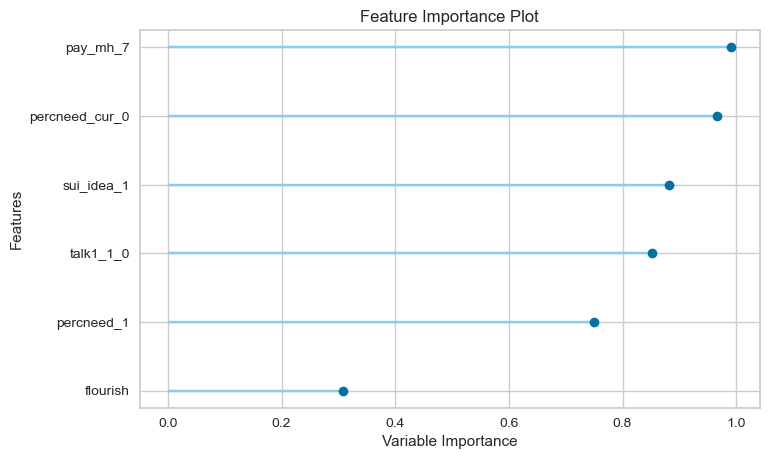

In [27]:
plot_model(lr, plot = 'feature')

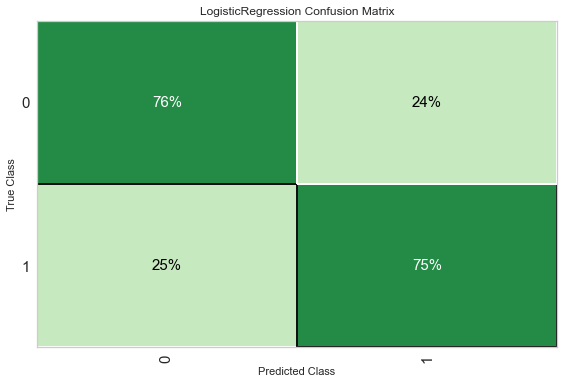

In [28]:
plot_model(lr, plot = 'confusion_matrix',plot_kwargs={'percent':True})

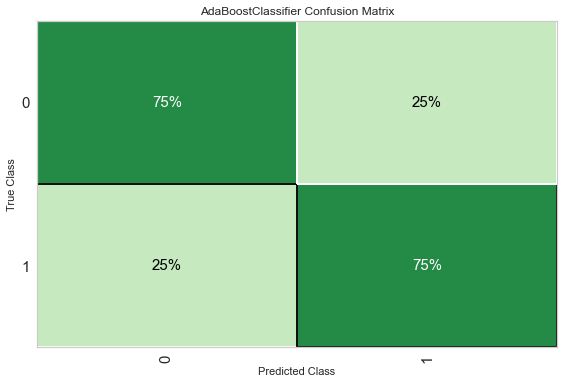

In [29]:
plot_model(boosted_lr, plot = 'confusion_matrix',plot_kwargs={'percent':True})

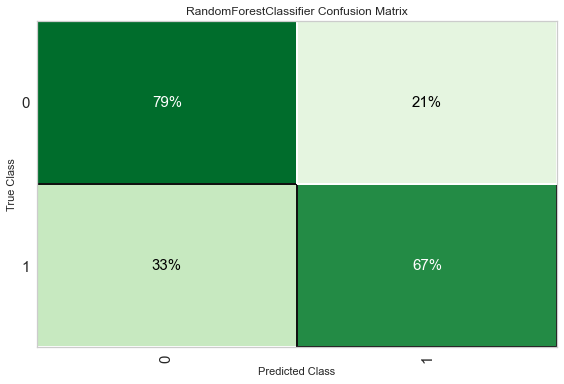

In [30]:
plot_model(rf, plot = 'confusion_matrix',plot_kwargs={'percent':True})

In [31]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

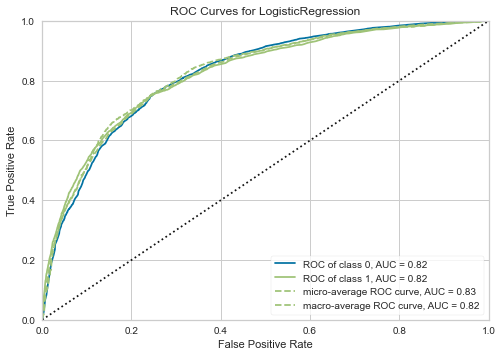

In [32]:
plot_model(lr, plot = 'auc')

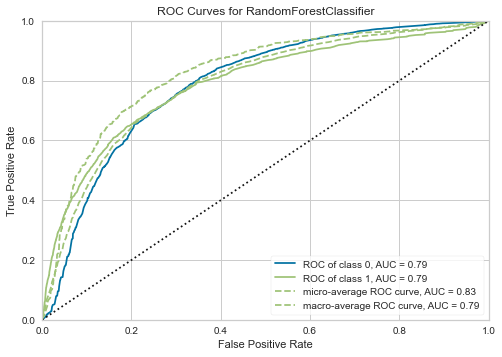

In [33]:
plot_model(rf, plot = 'auc')

In [25]:
predictions = predict_model(lr, data=data_unseen)
predictions.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,fin_comp2,pay_worry,pay_fam,pay_self,pay_other,pay_grant,pay_loan,bmi,Label,Score
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,25.386111,0,0.9069
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,21.031478,1,0.7038
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,35.296306,1,0.5959
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,22.044766,1,0.9615
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,26.443866,1,0.6923


In [ ]:
save_model(lr, 'log_regr_pipeline_v2')

In [ ]:
predicts = ["4", "22", "22", "1", "1","1","1","1","1","1"]
final = np.array(predicts)
cols = ["hours_work_paid", "age", "bmi", "residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"]

data_unseen2 = pd.DataFrame([final], columns = cols)
prediction = predict_model(lr, data=data_unseen2, round = 0)
prediction = prediction.Score[0]
prediction

In [ ]:
save_model(rf, 'rf_pipeline')